# Importing libraries


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score


# Data collection


In [6]:
#loading csv data to a Pandas dataframe
gold_data = pd.read_csv("C:\\Users\\SANJA\\OneDrive\\Desktop\\ML MODELS\\Gold price prediction model\\archive (1)\\gld_price_data.csv")

In [7]:
#print head
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.size

13740

In [10]:
gold_data.shape

(2290, 6)

In [11]:
#getting some basic information about the data
gold_data.describe() 
#getting statistical measures of the data.

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# correlation = gold_data.corr()

C:\Users\SANJA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

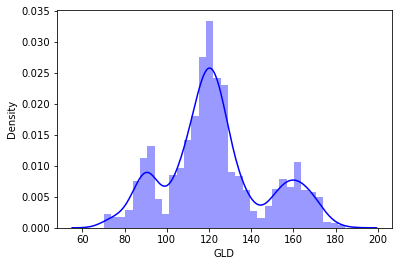

In [17]:
# #constructing a heatmap to understand the correlation
# plt.figure(figsize =(8,8))
# sns.heatmap(correlation, char=True, fmt=)
#checkinjg the distribution of teh GLD price
sns.distplot(gold_data['GLD'],color = 'blue')

In [18]:
#splitting the features and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
#Splitting into test and train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=2)

# model training
Random Forest Model

In [22]:
 RF = RandomForestRegressor(n_estimators = 100)

In [23]:
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
#MOdel evaluation
#prediction on test data
test_data_prediction = RF.predict(X_test)
print(test_data_prediction)

[168.59489979  82.13240009 115.75630025 127.70410056 120.90930127
 154.69179749 150.2683981  126.04840013 117.47329885 125.90530069
 116.50340111 171.52350143 141.64089834 167.55809801 115.25430041
 117.7885004  138.54790328 170.2571011  159.29120222 159.75319968
 155.14580007 125.26600037 175.6948992  157.2408043  125.26650028
  93.82859995  77.76319998 120.67419992 119.10449917 167.38470056
  88.19200079 125.36039999  91.10640035 117.69249996 121.24549918
 136.78160131 115.64010123 114.52190102 149.67099925 107.12980059
 104.55010234  87.17569773 126.43080037 117.75930026 152.83039857
 119.56930021 108.32099965 107.92019803  93.08440065 127.16009753
  74.90500049 113.66579931 121.21130002 111.32459964 118.85639871
 120.76599978 160.6239994  169.13550093 146.96829741  85.70229832
  94.23940022  86.90849937  90.49450024 118.88320077 126.40820112
 127.47329994 170.3488     122.2432995  117.41459893  98.69150016
 168.45970111 143.05019843 132.0486029  121.14400223 121.02289972
 119.56520

In [26]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9883997987040472


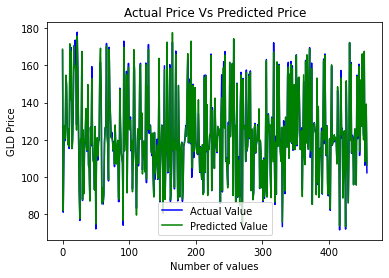

In [29]:
#Compare the actual value and predicted values in a plot
Y_test = list(Y_test)
plt.plot(Y_test,color ='blue',label='Actual Value')
plt.plot(test_data_prediction,color = 'green',label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [34]:
# #checking the accuracy of the model
# X_train_prediction = RF.predict(X_test)
# training_data_accuracy = accuracy_score(X_train_prediction,Y_test)
# print("Accuracy on training data : ",training_data_accuracy)

In [37]:
#making a predictive system
input_data =np.array([[2697.790039,14.3700,15.5300,1.184722]])
prediction = RF.predict(input_data)
print("The predicted price for gold is : ",prediction)

The predicted price for gold is :  [123.67840055]


In [38]:
input_data=np.array([[2,3,4,5]])
prediction = RF.predict(input_data)
print("The predicted price for gold is : ",prediction)

The predicted price for gold is :  [77.43999909]
